In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
# Loading the breast cancer dataset
from sklearn.datasets import load_breast_cancer

breast = load_breast_cancer()
breast_data = breast.data 
breast_labels = breast.target # these are the labels to predict (benign/ malignant)

labels = np.reshape(breast_labels,(569,1)) 
final_breast_data = np.concatenate([breast_data,labels],axis=1) # build full dataset
breast_dataset = pd.DataFrame(final_breast_data) # make into a Pandas dataframe


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [35]:
# adding the feature names to columns, names to labels

features = breast.feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset['label'].replace(0, 'Benign',inplace=True)
breast_dataset['label'].replace(1, 'Malignant',inplace=True)


In [48]:
breast_dataset.shape

(569, 31)

In [36]:
breast_dataset.loc[:].values

array([[17.99, 10.38, 122.8, ..., 0.4601, 0.1189, 'Benign'],
       [20.57, 17.77, 132.9, ..., 0.275, 0.08902, 'Benign'],
       [19.69, 21.25, 130.0, ..., 0.3613, 0.08758, 'Benign'],
       ...,
       [16.6, 28.08, 108.3, ..., 0.2218, 0.0782, 'Benign'],
       [20.6, 29.33, 140.1, ..., 0.4087, 0.124, 'Benign'],
       [7.76, 24.54, 47.92, ..., 0.2871, 0.07039, 'Malignant']],
      dtype=object)

In [49]:
# Standardize the features - PCA is influenced by scale.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
x = breast_dataset.loc[:, features].values # note that we're only selecting features, not the labels
x = MinMaxScaler().fit_transform(x) # here we scale the data. Better results seen using MinMax.

feat_cols = ['feature'+ str(i) for i in range(x.shape[1])]
normalised_breast = pd.DataFrame(x,columns=feat_cols)
normalised_breast.tail()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315
568,0.036869,0.501522,0.028540,0.015907,0.000000,0.074351,0.000000,0.000000,0.266162,0.187026,...,0.054287,0.489072,0.043578,0.020497,0.124084,0.036043,0.000000,0.000000,0.257441,0.100682


In [50]:
# Call the PCA method and fit_transform

from sklearn.decomposition import PCA
pca_breast = PCA(n_components=2)
principalComponents_breast = pca_breast.fit_transform(x)

In [51]:
# create the dataframe for all samples with PCA 1 and 2

principal_breast_Df = pd.DataFrame(data = principalComponents_breast
             , columns = ['principal component 1', 'principal component 2'])
principal_breast_Df.tail()

,principal component 1,principal component 2
564,1.002840,-0.474785
565,0.620757,-0.517200
566,0.226311,-0.287946
567,1.677834,0.335946
568,-0.905068,-0.104109


In [52]:
# Explained variance ratio shows the amount of information retained by each principal component. 
# note that here, PC1 holds 53 % and PC2 holds 17 %, meaning that we've lost 30 % of the information
# in projecting 30 dimensions onto 2. 

print('Explained variation per principal component: {}'.format(pca_breast.explained_variance_ratio_))

Explained variation per principal component: [0.53097689 0.1728349 ]


<Figure size 432x288 with 0 Axes>

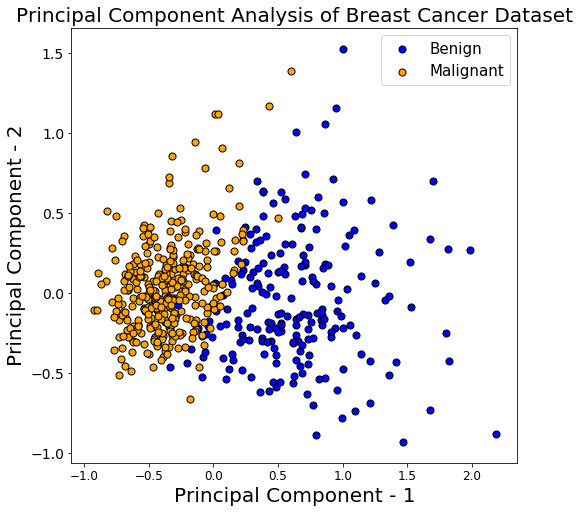

In [53]:
# Now we plot the samples along the 2 PCA axes. 

plt.figure()
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ['Benign', 'Malignant']
colors = ['blue', 'orange']
for target, color in zip(targets,colors):
    indicesToKeep = breast_dataset['label'] == target
    plt.scatter(principal_breast_Df.loc[indicesToKeep, 'principal component 1']
               , principal_breast_Df.loc[indicesToKeep, 'principal component 2'], 
                c = color, s = 50, edgecolor = 'black')

plt.legend(targets,prop={'size': 15})